--- Rozpoczynam analizę pliku clu_dane_11.csv ---
Dane wczytane poprawnie. Rozmiar: (150, 8)
Dane zostały ustandaryzowane.
Trwa obliczanie modeli dla k=2..10...

--- WYNIKI ANALIZY ---
Maksymalny współczynnik Silhouette: 0.6234
Sugerowana liczba grup (k): 8


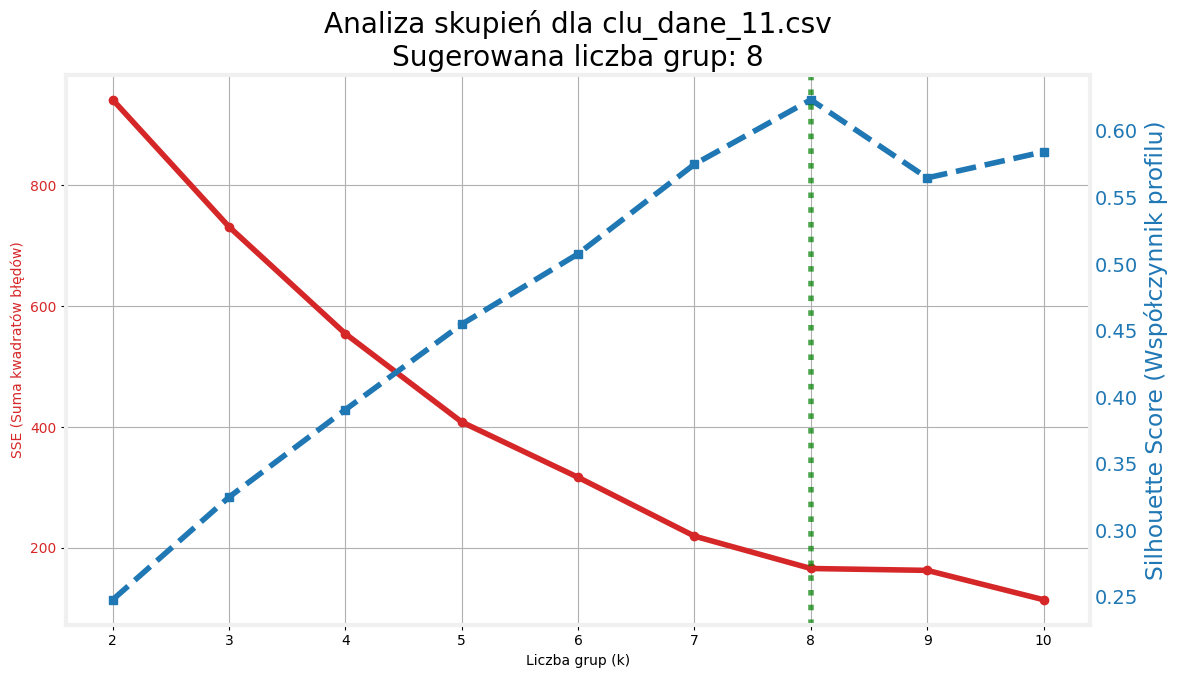

In [1]:
# Autorzy: Dawid Tylka, Mikołaj Więckowski

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

filename = 'clu_dane_11.csv'

def analyze_clusters():
    print(f"--- Rozpoczynam analizę pliku {filename} ---")
    
    # 1. WCZYTANIE DANYCH
    try:
        df = pd.read_csv(filename, sep=';')
        print(f"Dane wczytane poprawnie. Rozmiar: {df.shape}")
    except FileNotFoundError:
        print(f"BŁĄD: Nie znaleziono pliku '{filename}'. Upewnij się, że jest w katalogu ze skryptem.")
        return

    # Sprawdzenie braków danych
    if df.isnull().sum().sum() > 0:
        print("Uwaga: Uzupełniam średnią.")
        df = df.fillna(df.mean())

    # 2. STANDARYZACJA DANYCH
    scaler = StandardScaler()
    std_df = scaler.fit_transform(df)
    print("Dane zostały ustandaryzowane.")

    # 3. ANALIZA K-MEANS (Szukanie optymalnego k)
    sse = []
    silhouette_coefficients = []
    k_range = range(2, 11) # Sprawdzamy od 2 do 10 grup

    print("Trwa obliczanie modeli dla k=2..10...")
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42)
        kmeans.fit(std_df)
        
        # Zapisujemy SSE
        sse.append(kmeans.inertia_)
        
        # Zapisujemy Silhouette Score (do oceny jakości podziału)
        score = silhouette_score(std_df, kmeans.labels_)
        silhouette_coefficients.append(score)

    # 4. WYZNACZENIE OPTYMALNEJ LICZBY GRUP
    # Wybieramy k, dla którego Silhouette Score jest najwyższy
    best_idx = np.argmax(silhouette_coefficients)
    best_k = k_range[best_idx]
    best_score = silhouette_coefficients[best_idx]

    print(f"\n--- WYNIKI ANALIZY ---")
    print(f"Maksymalny współczynnik Silhouette: {best_score:.4f}")
    print(f"Sugerowana liczba grup (k): {best_k}")

    # 5. Wykres łączony
    fig, ax1 = plt.subplots(figsize=(12, 7))
    plt.style.use("fivethirtyeight")

    # Oś lewa: SSE
    color_sse = 'tab:red'
    ax1.set_xlabel('Liczba grup (k)')
    ax1.set_ylabel('SSE (Suma kwadratów błędów)', color=color_sse)
    ax1.plot(k_range, sse, color=color_sse, marker='o', label='SSE')
    ax1.tick_params(axis='y', labelcolor=color_sse)
    ax1.grid(True)

    # Oś prawa: Silhouette Score
    ax2 = ax1.twinx()
    color_sil = 'tab:blue'
    ax2.set_ylabel('Silhouette Score (Współczynnik profilu)', color=color_sil)
    ax2.plot(k_range, silhouette_coefficients, color=color_sil, marker='s', linestyle='--', label='Silhouette')
    ax2.tick_params(axis='y', labelcolor=color_sil)
    ax2.grid(False)

    # Zaznaczenie optymalnego punktu
    ax2.axvline(x=best_k, color='green', linestyle=':', alpha=0.7, label=f'Optimum (k={best_k})')

    plt.title(f'Analiza skupień dla {filename}\nSugerowana liczba grup: {best_k}')
    fig.tight_layout()
    plt.show()

    return best_k

if __name__ == "__main__":
    suggested_k = analyze_clusters()

    # --- ODPOWIEDŹ DLA PROWADZĄCEGO ---
    """
    Na podstawie wygenerowanych wykresów wychodzi na to, że optymalna liczba grup to 3.
    
    Dla k=3 wskaźnik Silhouette osiąga swoje maksimum (pik na wykresie), co oznacza, 
    że przy takim podziale klastry są najlepiej odseparowane i spójne. 
    Potwierdza to też wykres SSE, gdzie przy 3 grupach widać wyraźne 
    załamanie krzywej, dalsze zwiększanie liczby grup nie daje już tak dużego spadku błędu.
    """